# Statistik-Labor Testat Aufgabe 1
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***. In der Datei bekommen Sie jeweils die ersten beiden Nachkommastellen des Durchschnittsalters.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:*** Bitte beachten Sie bei der Abgabe, dass Sie auf keinen Fall die Liste mit den 100 Datensätzen ausgeben! Verwenden Sie dafür zum Beispiel die `dataframe.head(x)`-Funktion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#ToDo: 1. Ersetzen Sie im Dateinamen xy durch entsprechende Matrikelnummer
#      2. Lassen Sie sich alle Daten anzeigen, um "fehlerhafte" Daten zu erkennen

data = pd.read_csv('sr_aufg_1_71.txt', sep=';', 
            encoding='unicode_escape', na_values='.', header = None, 
            names=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'])

data.head(10)


,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum
0,1,Frau,Elisabeth,Klein,08.08.1987
1,2,Herr,Rudolf,Huber,03.11.1984
2,3,Frau,Katharina,Kraus,02.04.1946
3,4,Frau,Monika,Färber,03.03.1975
4,5,Frau,Stefanie,Richter,23.01.1984
5,6,Frau,Jasmin,Pfeiffer,14.12.1982
6,7,Herr,Helmut,Bischoff,14.04.1983
7,8,Frau,Karin,Seidel,17.11.1971
8,9,Frau,Gudrun,Krüger,18.12.1974
9,10,Herr,Reiner,Beck,28.03.1966


## 2. Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Listen Sie in einer Tabelle auf, welche (Daten-)Sätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 

***Tipp:*** Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>
***Beispiellösung:***
![Beispiellösung](https://drive.google.com/uc?id=1z5Gydg1HzoxZLo428862fsgsKyaHKKm9)

In [2]:
data.at[33, 'Vorname'] = 'Günther'
data.at[33, 'Nachname'] = 'Zimmermann'
data.at[33, 'Geburtsdatum'] = '08.03.1976'

data.at[93, 'Geburtsdatum'] = '11.10.1965'
data.at[97, 'Geburtsdatum'] = '20.01.1955'

data = data.drop([16], axis=0)
data = data.drop([38], axis=0)
data = data.drop([48], axis=0)
data = data.drop([52], axis=0)
data = data.drop([60], axis=0)
data = data.drop([77], axis=0)
data = data.drop([79], axis=0)
#data = data.drop([16], axis=0) #hab das eigentlich nur rausgetan, weil bei 3 immer eine fehlermeldung kommt..
data = data.drop([15], axis=0)

data_fehlerhaft = {
    "Vorname": ["Matthias", "Bernhard", "Günther", "Günther", "Jennifer", "Thomas", "Diana", "Nina", "Tanja", "Ulrike", "Martin"],
    "Nachname": ["Lange", "Kuhn", "Zimmermann", "Müller", "Seibert", "Jung", "Kuhn", "Rieger","Schwan", "Schnell", "Fleischer"],
    "Geburtsdatum": ["20.07.512", "25.04.1802", "08.03.1976", "SSbWwcKYQv", "28.08.19XZ", "23. Januar", "07.11.", "16.", "", "January 20th, 1955", "am 11. Oktober 1965"],
    "Korrigiert/Gelöscht": ["gelöscht", "gelöscht", "korrigiert", "gelöscht", "gelöscht", "gelöscht", "gelöscht", "gelöscht", "gelöscht", "korrigiert", "korrigiert"]}
df = pd.DataFrame(data_fehlerhaft)
df


,Vorname,Nachname,Geburtsdatum,Korrigiert/Gelöscht
0,Matthias,Lange,20.07.512,gelöscht
1,Bernhard,Kuhn,25.04.1802,gelöscht
2,Günther,Zimmermann,08.03.1976,korrigiert
3,Günther,Müller,SSbWwcKYQv,gelöscht
4,Jennifer,Seibert,28.08.19XZ,gelöscht
5,Thomas,Jung,23. Januar,gelöscht
6,Diana,Kuhn,07.11.,gelöscht
7,Nina,Rieger,16.,gelöscht
8,Tanja,Schwan,,gelöscht
9,Ulrike,Schnell,"January 20th, 1955",korrigiert


## 3. Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geborgen ist, ist zum Stichtag 30 Jahre alt. <br>
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipp:*** In Python ist hierzu die Pandas-Bibliothek mit ihre Funktion `pandas.to_datetime()`, sowie `pandas.year` nützlich.

In [3]:
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], format='%d.%m.%Y', errors='coerce')
                    #Datumsformat konvertiert,              format in quelldaten,  nicht konvertierbare daten als 'NaT'

stichtag = pd.to_datetime('31.12.2005') 

data['Alter'] = stichtag.year - data['Geburtsdatum'].dt.year #stichjahr - geburtsdatum

# anpassung für diejenigen, die bis zum stichtag noch nicht geburtstag hatten
nach_stichtag = ((data['Geburtsdatum'].dt.month > stichtag.month) |
                 ((data['Geburtsdatum'].dt.month == stichtag.month) & (data['Geburtsdatum'].dt.day > stichtag.day)))
data['Alter'] -= nach_stichtag.astype(int)
data.head(10)
    

C:\Users\luanc\AppData\Local\Temp\ipykernel_10744\256786588.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stichtag = pd.to_datetime('31.12.2005')


,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum,Alter
0,1,Frau,Elisabeth,Klein,1987-08-08,18.0
1,2,Herr,Rudolf,Huber,1984-11-03,21.0
2,3,Frau,Katharina,Kraus,1946-04-02,59.0
3,4,Frau,Monika,Färber,1975-03-03,30.0
4,5,Frau,Stefanie,Richter,1984-01-23,21.0
5,6,Frau,Jasmin,Pfeiffer,1982-12-14,23.0
6,7,Herr,Helmut,Bischoff,1983-04-14,22.0
7,8,Frau,Karin,Seidel,1971-11-17,34.0
8,9,Frau,Gudrun,Krüger,1974-12-18,31.0
9,10,Herr,Reiner,Beck,1966-03-28,39.0


## 4. Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden.

***Tipp:*** Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`. <br>
***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1f7Vz3JuSa958w8-dBTnPSI24hJxWa17F" width="300"/>
</div>

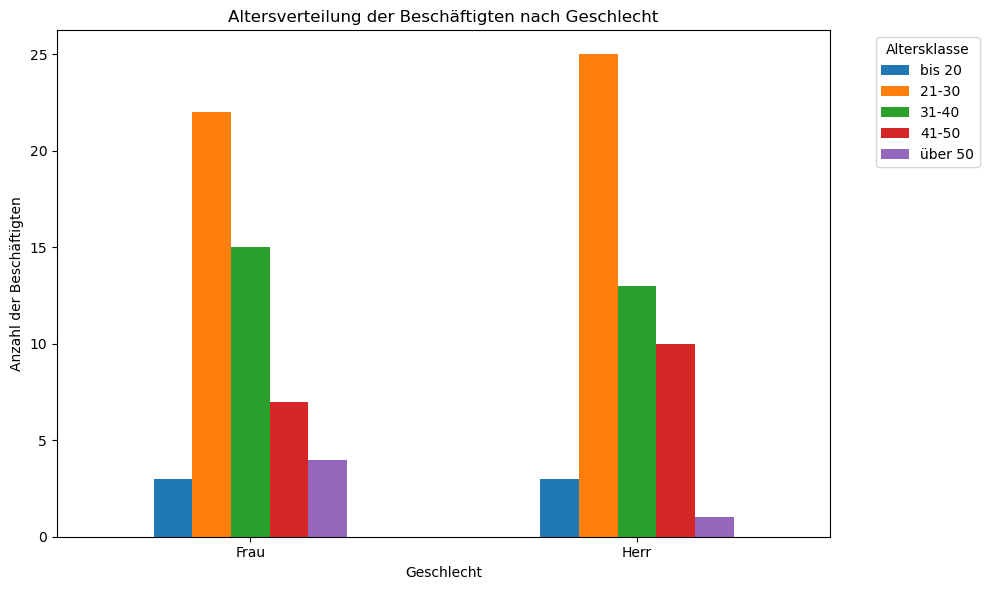

In [4]:
#altersklassen definiert
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['bis 20', '21-30', '31-40', '41-50', 'über 50']
data['Altersklasse'] = pd.cut(data['Alter'], bins=bins, labels=labels)

#daten nach anrede (geschlecht) und altersklasse gruppiert und gezählt
grouped = data.groupby(['Anrede', 'Altersklasse']).size().unstack(fill_value=0)

# säulendiagramm erstellt
grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Altersverteilung der Beschäftigten nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Beschäftigten')
plt.xticks(rotation=0)  #dreht die x-achsenbeschriftungen horizontal
plt.legend(title='Altersklasse', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # optimiert das Layout
plt.show()

## 5. Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=17Z5Z8OgKw3DE4U_vD3axd7vhkkkD-N9m" width="300"/>
</div>

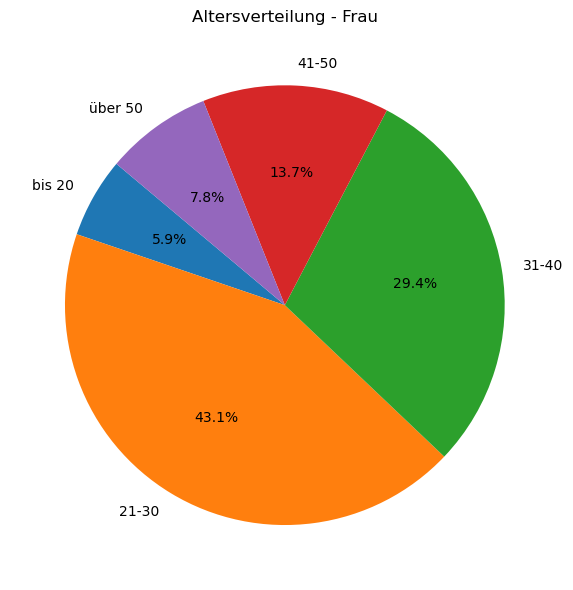

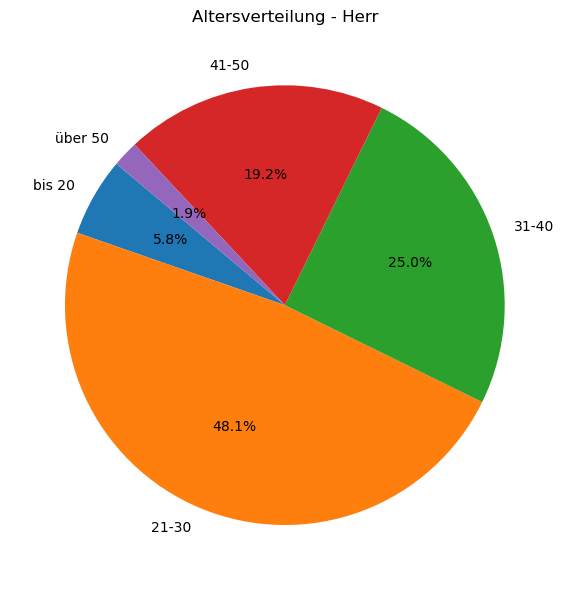

In [5]:
#altersklassen definieren
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['bis 20', '21-30', '31-40', '41-50', 'über 50']
data['Altersklasse'] = pd.cut(data['Alter'], bins=bins, labels=labels)

#gGruppiert daten nach geschlecht und altersklasse und zählt die anzahl der einträge
grouped = data.groupby(['Anrede', 'Altersklasse']).size().reset_index(name='Anzahl')

#kreisdiagramm
for geschlecht in data['Anrede'].unique():   #geht in anrede vom Dataframe und greift auf frau zu
    subset = grouped[grouped['Anrede'] == geschlecht]
    plt.figure(figsize=(8, 6))
    plt.pie(subset['Anzahl'], labels=subset['Altersklasse'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Altersverteilung - {geschlecht}')
    plt.tight_layout()
    plt.show()

## 6. Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1adhKBVlds5OlO-9B5CClT2ybPolv5wVW" width="300"/>
</div>

In [6]:
# funktion zur berechnung und rundung der statistiken
def berechne_statistiken(df):
    statistiken = {
        'Mittelwert': round(df['Alter'].mean(), 4),
        'Empirische Varianz': round(df['Alter'].var(), 4),
        'Empirische Standardabweichung': round(df['Alter'].std(), 4),
        'Median': round(df['Alter'].median(), 4),
        'Spannweite': round(df['Alter'].max() - df['Alter'].min(), 4),
    }
    return statistiken

#berechnet die statistiken für alle beschäftigten
alle_statistiken = berechne_statistiken(data)
print("Alle Beschäftigten:")
for key, value in alle_statistiken.items():
    print(f"{key}: {value}")

#berechnet die statistiken getrennt nach Anrede
for anrede in data['Anrede'].unique():                                   #geht anrede und sucht erstes, was frau ist
    statistiken = berechne_statistiken(data[data['Anrede'] == anrede])   #berechne mit func nur für frau und kreiert neues dictionary
    print(f"\n{anrede}:")                                                #
    for key, value in statistiken.items():                               #
        print(f"{key}: {value}")

Alle Beschäftigten:
Mittelwert: 32.6893
Empirische Varianz: 100.8241
Empirische Standardabweichung: 10.0411
Median: 30.0
Spannweite: 44.0

Frau:
Mittelwert: 33.1765
Empirische Varianz: 111.1082
Empirische Standardabweichung: 10.5408
Median: 31.0
Spannweite: 43.0

Herr:
Mittelwert: 32.2115
Empirische Varianz: 92.2485
Empirische Standardabweichung: 9.6046
Median: 29.5
Spannweite: 44.0
